In [16]:
import numpy as np
import rowan
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

import coxeter

In [17]:


# Parameters for the hexagonal prism:
h = 2.0  # Height of the prism
a = 1.0  # Distance from the center to a vertex of the hexagon

# Define the six angles for the regular hexagon (in radians)
angles = np.linspace(0, 2*np.pi, 7)[:-1]  # 6 angles from 0 to 2pi

# Construct vertices:
# Bottom face at z = -h/2
bottom_vertices = [(a * np.cos(theta), a * np.sin(theta), -h/2) for theta in angles]
# Top face at z = +h/2
top_vertices = [(a * np.cos(theta), a * np.sin(theta), h/2) for theta in angles]

# Combine vertices (order: bottom vertices first, then top vertices)
vertices = bottom_vertices + top_vertices

# Define faces:
# Bottom face (using vertices 0 through 5)
bottom_face = list(range(0, 6))
# Top face (using vertices 6 through 11)
top_face = list(range(6, 12))
# Side faces (six quadrilaterals connecting bottom and top edges)
side_faces = []
for i in range(6):
    side_face = [i, (i + 1) % 6, ((i + 1) % 6) + 6, i + 6]
    side_faces.append(side_face)

# Combine all faces
faces = [bottom_face, top_face] + side_faces

# Create a Polyhedron from the vertices and faces
prism = coxeter.families.DOI_SHAPE_REPOSITORIES["10.1126/science.1220869"][0].get_shape("O03")

# Compute the inertia tensor about the centroid (assuming uniform density)
inertia_tensor = prism.inertia_tensor()

# Output results:
print("Vertices:")
for i, v in enumerate(vertices):
    print(f"V_{i} = {v}")

print("\nFaces:")
for face in faces:
    print(face)

print("\nInertia Tensor:")
print(inertia_tensor)

TypeError: 'numpy.ndarray' object is not callable

In [41]:
prism = coxeter.families.DOI_SHAPE_REPOSITORIES["10.1126/science.1220869"][0].get_shape("O03")

prism

coxeter.shapes.Polyhedron(vertices=[[-0.7274157573144809, 0.0, -0.36370787865724047], [-0.7274157573144809, 0.0, 0.36370787865724047], [-0.36370787865724047, -0.6299605249474366, -0.36370787865724047], [-0.36370787865724047, -0.6299605249474366, 0.36370787865724047], [-0.36370787865724047, 0.6299605249474366, -0.36370787865724047], [-0.36370787865724047, 0.6299605249474366, 0.36370787865724047], [0.36370787865724047, -0.6299605249474366, -0.36370787865724047], [0.36370787865724047, -0.6299605249474366, 0.36370787865724047], [0.36370787865724047, 0.6299605249474366, -0.36370787865724047], [0.36370787865724047, 0.6299605249474366, 0.36370787865724047], [0.7274157573144809, 0.0, -0.36370787865724047], [0.7274157573144809, 0.0, 0.36370787865724047]], faces=[array([0, 2, 3, 1], dtype=int32), array([2, 6, 7, 3], dtype=int32), array([ 0,  4,  8, 10,  6,  2], dtype=int32), array([ 6, 10, 11,  7], dtype=int32), array([ 8,  9, 11, 10], dtype=int32), array([ 1,  3,  7, 11,  9,  5], dtype=int32), 

In [20]:
def plot_polyhedron(poly, include_tensor=False, length_scale=3):
    """Plot a polyhedron a provided set of matplotlib axes.

    The include_tensor parameter controls whether or not the axes
    of the inertia tensor are plotted. If they are, then the
    length_scale controls how much the axis vectors are extended,
    which is purely for visualization purposes.
    """
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "3d"})

    # Generate a triangulation for plot_trisurf.
    vertex_to_index = {tuple(v): i for i, v in enumerate(poly.vertices)}
    triangles = [
        [vertex_to_index[tuple(v)] for v in triangle]
        for triangle in poly._surface_triangulation()
    ]

    # Plot the triangulation to get faces, but without any outlines because outlining
    # the triangulation will include lines along faces where coplanar simplices intersect.
    verts = poly.vertices
    ax.plot_trisurf(
        verts[:, 0],
        verts[:, 1],
        verts[:, 2],
        triangles=triangles,
        # Make the triangles partly transparent.
        color=tuple([*plt.get_cmap("tab10").colors[4], 0.3]),
    )

    # Add lines manually.
    for face in poly.faces:
        verts = poly.vertices[face]
        verts = np.concatenate((verts, verts[[0]]))
        ax.plot(verts[:, 0], verts[:, 1], verts[:, 2], c="k", lw=0.4)

    # If requested, plot the axes of the inertia tensor.
    if include_tensor:
        centers = np.repeat(poly.center[np.newaxis, :], axis=0, repeats=3)
        arrows = poly.inertia_tensor * length_scale
        ax.quiver3D(
            centers[:, 0],
            centers[:, 1],
            centers[:, 2],
            arrows[:, 0],
            arrows[:, 1],
            arrows[:, 2],
            color="k",
            lw=3,
        )

    ax.view_init(elev=30, azim=-90)
    limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
    center = np.mean(limits, axis=1)
    radius = 0.5 * np.max(limits[:, 1] - limits[:, 0])
    ax.set_xlim([center[0] - radius, center[0] + radius])
    ax.set_ylim([center[1] - radius, center[1] + radius])
    ax.set_zlim([center[2] - radius, center[2] + radius])
    ax.tick_params(which="both", axis="both", labelsize=0)
    fig.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    fig.tight_layout()

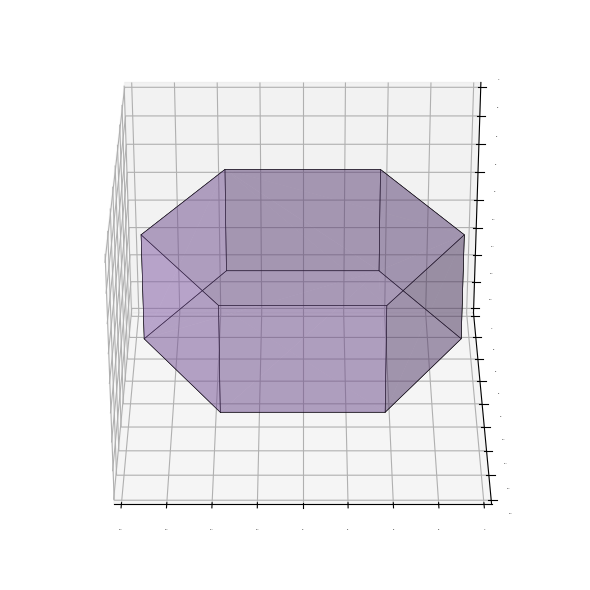

In [19]:
plot_polyhedron(prism)

In [42]:
hexagon_b = coxeter.families.RegularNGonFamily.get_shape(6)
hexagon_b.vertices = np.array([
    [a, 0, -h/2],
    [a*np.cos(np.pi/3), a*np.sin(np.pi/3), -h/2],
    [a*np.cos(np.pi*2/3), a*np.sin(np.pi*2/3), -h/2],
    [a*np.cos(np.pi), a*np.sin(np.pi), -h/2],
    [a*np.cos(np.pi*4/3), a*np.sin(np.pi*4/3), -h/2],
    [a*np.cos(np.pi*5/3), a*np.sin(np.pi*5/3), -h/2]
])

hexagon_t = coxeter.families.RegularNGonFamily.get_shape(6)
hexagon_t.vertices = np.array([
    [a, 0, h/2],
    [a*np.cos(np.pi/3), a*np.sin(np.pi/3), h/2],
    [a*np.cos(np.pi*2/3), a*np.sin(np.pi*2/3), h/2],
    [a*np.cos(np.pi), a*np.sin(np.pi), h/2],
    [a*np.cos(np.pi*4/3), a*np.sin(np.pi*4/3), h/2],
    [a*np.cos(np.pi*5/3), a*np.sin(np.pi*5/3), h/2]
])



AttributeError: can't set attribute 'vertices'

In [36]:


hexagon = coxeter.families.RegularNGonFamily.get_shape(6)
hexagon.circumcircle_radius = a
hexagon

coxeter.shapes.Polygon(vertices=[[1.0000000000000002, 0.0, 0.0], [0.5000000000000001, 0.8660254037844386, 0.0], [-0.4999999999999999, 0.8660254037844388, 0.0], [-1.0000000000000002, 1.2246467991473535e-16, 0.0], [-0.5000000000000006, -0.8660254037844386, 0.0], [0.49999999999999944, -0.8660254037844392, 0.0]], normal=[0.0, 0.0, 1.0])

In [18]:
a = 2.5e-6  # Side length of the hexagon
h = 0.27e-6  # Thickness of the prism
rho_0 = 3800  # Uniform density

vertices = np.array([
    [a, 0, -h/2],
    [a*np.cos(np.pi/3), a*np.sin(np.pi/3), -h/2],
    [a*np.cos(np.pi*2/3), a*np.sin(np.pi*2/3), -h/2],
    [a*np.cos(np.pi), a*np.sin(np.pi), -h/2],
    [a*np.cos(np.pi*4/3), a*np.sin(np.pi*4/3), -h/2],
    [a*np.cos(np.pi*5/3), a*np.sin(np.pi*5/3), -h/2],
    [a, 0, h/2],
    [a*np.cos(np.pi/3), a*np.sin(np.pi/3), h/2],
    [a*np.cos(np.pi*2/3), a*np.sin(np.pi*2/3), h/2],
    [a*np.cos(np.pi), a*np.sin(np.pi), h/2],
    [a*np.cos(np.pi*4/3), a*np.sin(np.pi*4/3), h/2],
    [a*np.cos(np.pi*5/3), a*np.sin(np.pi*5/3), h/2]
])

theta = np.pi/2

rot_matrix = np.array([
    [np.cos(theta), 0, np.sin(theta)],
    [0, 1, 0],
    [-np.sin(theta), 0, np.cos(theta)]
    ])

rotated_vertices = []

for vertex in range(len(vertices)):
    rotated_vertices.append(rot_matrix@vertices[vertex].T)
rotated_vertices = np.array(
    rotated_vertices
)
print(vertices)
print(rotated_vertices)

[[ 2.50000000e-06  0.00000000e+00 -1.35000000e-07]
 [ 1.25000000e-06  2.16506351e-06 -1.35000000e-07]
 [-1.25000000e-06  2.16506351e-06 -1.35000000e-07]
 [-2.50000000e-06  3.06161700e-22 -1.35000000e-07]
 [-1.25000000e-06 -2.16506351e-06 -1.35000000e-07]
 [ 1.25000000e-06 -2.16506351e-06 -1.35000000e-07]
 [ 2.50000000e-06  0.00000000e+00  1.35000000e-07]
 [ 1.25000000e-06  2.16506351e-06  1.35000000e-07]
 [-1.25000000e-06  2.16506351e-06  1.35000000e-07]
 [-2.50000000e-06  3.06161700e-22  1.35000000e-07]
 [-1.25000000e-06 -2.16506351e-06  1.35000000e-07]
 [ 1.25000000e-06 -2.16506351e-06  1.35000000e-07]]
[[-1.35000000e-07  0.00000000e+00 -2.50000000e-06]
 [-1.35000000e-07  2.16506351e-06 -1.25000000e-06]
 [-1.35000000e-07  2.16506351e-06  1.25000000e-06]
 [-1.35000000e-07  3.06161700e-22  2.50000000e-06]
 [-1.35000000e-07 -2.16506351e-06  1.25000000e-06]
 [-1.35000000e-07 -2.16506351e-06 -1.25000000e-06]
 [ 1.35000000e-07  0.00000000e+00 -2.50000000e-06]
 [ 1.35000000e-07  2.16506351e

In [65]:
vertices[1]

array([ 1.25000000e-06,  2.16506351e-06, -1.35000000e-07])

array([[ 2.17941320e-26, -8.71316328e-43, -1.82004586e-44],
       [-8.71316328e-43,  2.17941320e-26,  6.24015722e-44],
       [-1.82004586e-44,  6.24015722e-44,  4.33858430e-26]])

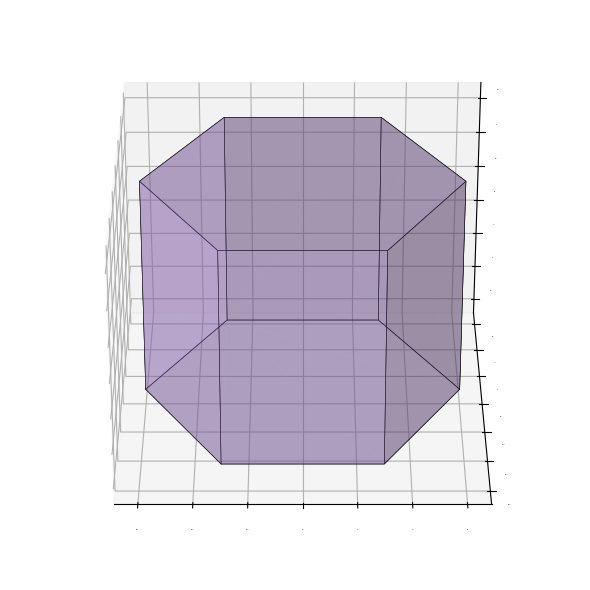

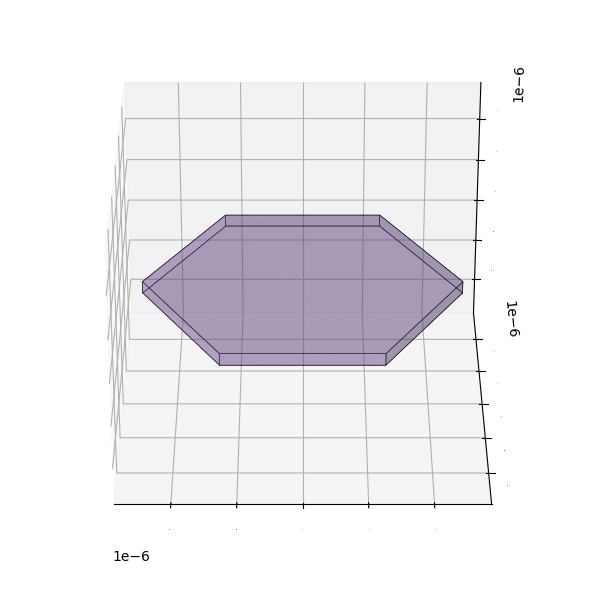

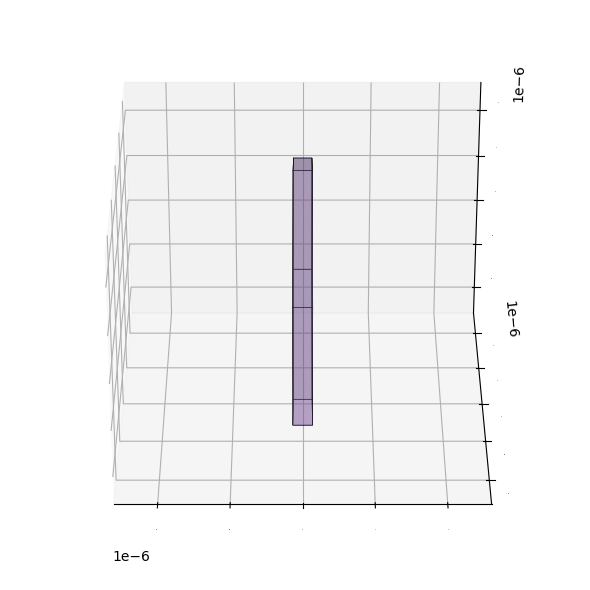

In [21]:
hexagon = coxeter.shapes.ConvexPolyhedron(vertices)
rotated_hexagon = coxeter.shapes.ConvexPolyhedron(rotated_vertices)
plot_polyhedron(hexagon)
plot_polyhedron(rotated_hexagon)
hexagon.inertia_tensor*rho_0

In [80]:
all_vertices = np.array([np.append(vertices, rotated_vertices)])
print(all_vertices)
print(vertices)


[[ 2.50000000e-06  0.00000000e+00 -1.35000000e-07  1.25000000e-06
   2.16506351e-06 -1.35000000e-07 -1.25000000e-06  2.16506351e-06
  -1.35000000e-07 -2.50000000e-06  3.06161700e-22 -1.35000000e-07
  -1.25000000e-06 -2.16506351e-06 -1.35000000e-07  1.25000000e-06
  -2.16506351e-06 -1.35000000e-07  2.50000000e-06  0.00000000e+00
   1.35000000e-07  1.25000000e-06  2.16506351e-06  1.35000000e-07
  -1.25000000e-06  2.16506351e-06  1.35000000e-07 -2.50000000e-06
   3.06161700e-22  1.35000000e-07 -1.25000000e-06 -2.16506351e-06
   1.35000000e-07  1.25000000e-06 -2.16506351e-06  1.35000000e-07
  -1.35000000e-07  0.00000000e+00 -2.50000000e-06 -1.35000000e-07
   2.16506351e-06 -1.25000000e-06 -1.35000000e-07  2.16506351e-06
   1.25000000e-06 -1.35000000e-07  3.06161700e-22  2.50000000e-06
  -1.35000000e-07 -2.16506351e-06  1.25000000e-06 -1.35000000e-07
  -2.16506351e-06 -1.25000000e-06  1.35000000e-07  0.00000000e+00
  -2.50000000e-06  1.35000000e-07  2.16506351e-06 -1.25000000e-06
   1.35000

In [81]:
hexagon_comp = coxeter.shapes.ConvexPolyhedron(all_vertices)
plot_polyhedron(hexagon_comp)

QhullError: QH6214 qhull input error: not enough points(1) to construct initial simplex (need 73)

While executing:  | qhull i Qt Qx
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 615213356  incidence  Qtriangulate  Qxact-merge  _zero-centrum
  Q3-no-merge-vertices-dim-high  _maxoutside  0


In [83]:
from coxeter.scene import Scene

compound = hexagon + rotated_hexagon
plot_polyhedron(compound)

ModuleNotFoundError: No module named 'coxeter.compound'

In [75]:
print(all_vertices)
print(vertices)


[ 2.50000000e-06  0.00000000e+00 -1.35000000e-07  1.25000000e-06
  2.16506351e-06 -1.35000000e-07 -1.25000000e-06  2.16506351e-06
 -1.35000000e-07 -2.50000000e-06  3.06161700e-22 -1.35000000e-07
 -1.25000000e-06 -2.16506351e-06 -1.35000000e-07  1.25000000e-06
 -2.16506351e-06 -1.35000000e-07  2.50000000e-06  0.00000000e+00
  1.35000000e-07  1.25000000e-06  2.16506351e-06  1.35000000e-07
 -1.25000000e-06  2.16506351e-06  1.35000000e-07 -2.50000000e-06
  3.06161700e-22  1.35000000e-07 -1.25000000e-06 -2.16506351e-06
  1.35000000e-07  1.25000000e-06 -2.16506351e-06  1.35000000e-07
 -1.35000000e-07  0.00000000e+00 -2.50000000e-06 -1.35000000e-07
  2.16506351e-06 -1.25000000e-06 -1.35000000e-07  2.16506351e-06
  1.25000000e-06 -1.35000000e-07  3.06161700e-22  2.50000000e-06
 -1.35000000e-07 -2.16506351e-06  1.25000000e-06 -1.35000000e-07
 -2.16506351e-06 -1.25000000e-06  1.35000000e-07  0.00000000e+00
 -2.50000000e-06  1.35000000e-07  2.16506351e-06 -1.25000000e-06
  1.35000000e-07  2.16506

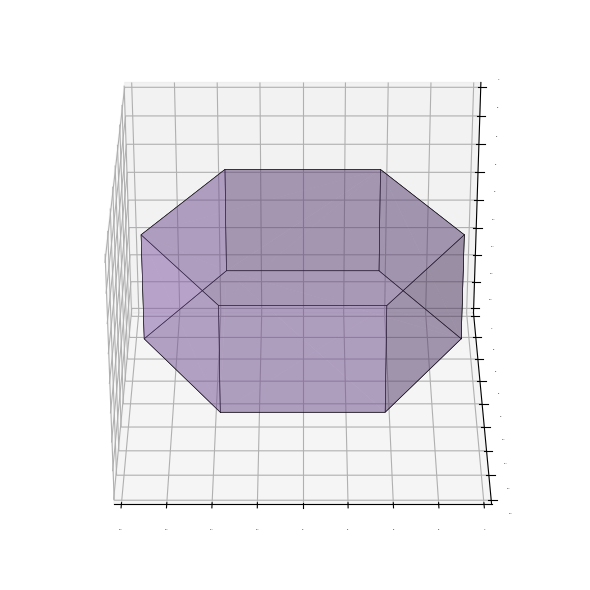

In [50]:
hexagon = coxeter.families.UniformPrismFamily.get_shape(6)
hexagon.
plot_polyhedron(hexagon)

In [ ]:
hexagon = coxeter.families.UniformPrismFamily.get_shape(6)
hexagon.
plot_polyhedron(hexagon)

In [1]:
import numpy as np
import trimesh
from shapely.geometry import Polygon

def create_hexagonal_prism(radius=1.0, height=2.0):
    """
    Creates a hexagonal prism mesh.
    
    Parameters:
        radius (float): Radius of the circumscribed circle of the hexagon.
        height (float): Height of the prism.
        
    Returns:
        trimesh.Trimesh: The generated hexagonal prism.
    """
    # Generate 6 equally spaced angles for the vertices of the hexagon
    angles = np.linspace(0, 2*np.pi, 7)[:-1]  # 6 points (exclude duplicate endpoint)
    points = [(radius * np.cos(a), radius * np.sin(a)) for a in angles]
    
    # Create a 2D hexagon polygon
    hexagon = Polygon(points)
    
    # Extrude the hexagon into a 3D prism along the z-axis
    prism = trimesh.creation.extrude_polygon(hexagon, height)
    return prism

# ----- Configuration -----
# Dimensions for the prisms
radius = 1.5
height = 3.0

# Rotation angle for the second prism in degrees
rotation_degrees = 30

# ----- Create the Prisms -----
prism1 = create_hexagonal_prism(radius, height)
prism2 = create_hexagonal_prism(radius, height)

# ----- Rotate the Second Prism -----
# Create a rotation matrix about the z-axis
rotation_radians = np.radians(rotation_degrees)
rotation_matrix = trimesh.transformations.rotation_matrix(rotation_radians, [0, 0, 1])
prism2.apply_transform(rotation_matrix)

# ----- Merge the Two Prisms -----
# Perform a Boolean union to merge overlapping volumes.
# Note: The union operation may use an external engine like OpenSCAD.
merged = trimesh.boolean.union([prism1, prism2])
if merged is None:
    raise RuntimeError("Boolean union failed. Ensure that you have an appropriate backend installed (e.g., OpenSCAD).")

# ----- Visualize the Result -----
# This will open an interactive viewer showing the merged mesh.
merged.show()

# Optionally, you can export the merged mesh to a file:
# merged.export('merged_hexagonal_prisms.stl')


In [86]:
pip install triangle

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 655.4 kB/s eta 0:00:03
   --------- ------------------------------ 0.3/1.4 MB 1.9 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 2.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 3.7 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import trimesh
from shapely.geometry import Polygon
import json

# Check for a triangulation engine
try:
    import triangle  # Try importing triangle as the triangulation engine
except ImportError:
    try:
        import mapbox_earcut  # Alternatively, check for mapbox_earcut
    except ImportError:
        raise ImportError("No available triangulation engine! "
                          "Please install 'triangle' (pip install triangle) or 'mapbox_earcut' (pip install mapbox_earcut)")

def create_hexagonal_prism(radius=1.0, height=2.0):
    """
    Creates a hexagonal prism mesh.
    
    Parameters:
        radius (float): Radius of the circumscribed circle of the hexagon.
        height (float): Height of the prism.
        
    Returns:
        trimesh.Trimesh: The generated hexagonal prism.
    """
    # Generate 6 equally spaced angles for the vertices of the hexagon
    angles = np.linspace(0, 2*np.pi, 7)[:-1]  # 6 points (exclude duplicate endpoint)
    points = [(radius * np.cos(a), radius * np.sin(a)) for a in angles]
    
    # Create a 2D hexagon polygon
    hexagon = Polygon(points)
    
    # Extrude the hexagon into a 3D prism along the z-axis
    prism = trimesh.creation.extrude_polygon(hexagon, height)
    return prism

# ----- Configuration -----
radius = 1.5
height = 3.0
rotation_degrees = 30

# ----- Create the Prisms -----
prism1 = create_hexagonal_prism(radius, height)
prism2 = create_hexagonal_prism(radius, height)

# ----- Rotate the Second Prism -----
rotation_radians = np.radians(rotation_degrees)
rotation_matrix = trimesh.transformations.rotation_matrix(rotation_radians, [0, 0, 1])
prism2.apply_transform(rotation_matrix)

# ----- Merge the Two Prisms -----
merged = trimesh.boolean.union([prism1, prism2])
if merged is None:
    raise RuntimeError("Boolean union failed. Ensure that you have an appropriate backend installed (e.g., OpenSCAD).")

# ----- Export Vertices and Faces -----
# Option 1: Export to Plain Text Files
np.savetxt('vertices.txt', merged.vertices, fmt='%.8f')
np.savetxt('faces.txt', merged.faces, fmt='%d')
print("Exported vertices to 'vertices.txt' and faces to 'faces.txt'.")

# Option 2: Export to a JSON File
mesh_data = {
    'vertices': merged.vertices.tolist(),
    'faces': merged.faces.tolist()
}
with open('mesh_data.json', 'w') as f:
    json.dump(mesh_data, f, indent=4)
print("Exported mesh data to 'mesh_data.json'.")

# ----- Visualize the Result (Optional) -----
merged.show()


Exported vertices to 'vertices.txt' and faces to 'faces.txt'.
Exported mesh data to 'mesh_data.json'.


In [7]:
merged.vertices.tolist()

[]

In [8]:
import numpy as np
import trimesh
from shapely.geometry import Polygon
import json

# Check for a triangulation engine for extrude_polygon
try:
    import triangle  # Try the triangle engine
except ImportError:
    try:
        import mapbox_earcut  # Alternatively, try mapbox_earcut
    except ImportError:
        raise ImportError("No available triangulation engine! "
                          "Please install 'triangle' (pip install triangle) or 'mapbox_earcut' (pip install mapbox_earcut).")

def create_hexagonal_prism(radius=1.0, height=2.0):
    """
    Create a hexagonal prism by extruding a 2D hexagon defined using shapely.
    """
    # Generate 6 vertices of a regular hexagon
    angles = np.linspace(0, 2*np.pi, 7)[:-1]  # 6 equally spaced angles
    points = [(radius * np.cos(a), radius * np.sin(a)) for a in angles]
    
    # Create a 2D hexagon using shapely
    hexagon = Polygon(points)
    
    # Extrude the hexagon along the z-axis to create a 3D prism
    prism = trimesh.creation.extrude_polygon(hexagon, height)
    return prism

# ----- Configuration -----
radius = 1.5
height = 3.0
rotation_degrees = 30  # Rotation angle for the second prism

# ----- Create the Prisms -----
prism1 = create_hexagonal_prism(radius, height)
prism2 = create_hexagonal_prism(radius, height)

# ----- Rotate the Second Prism -----
rotation_radians = np.radians(rotation_degrees)
rotation_matrix = trimesh.transformations.rotation_matrix(rotation_radians, [0, 0, 1])
prism2.apply_transform(rotation_matrix)

# ----- Merge the Two Prisms using Boolean Union -----
# Try available engines: first 'scad' (OpenSCAD), then 'blender'
merged = None
for engine in ['scad', 'blender']:
    try:
        merged = trimesh.boolean.union([prism1, prism2], engine=engine)
        if merged is not None:
            print("Boolean union succeeded using engine:", engine)
            break
    except Exception as e:
        print(f"Boolean union failed using engine {engine}: {e}")

if merged is None:
    raise RuntimeError("Boolean union failed with all available engines. "
                       "Ensure OpenSCAD or Blender is installed and in your PATH.")

# ----- Export Vertices and Faces -----
# Export to plain text files
np.savetxt('vertices.txt', merged.vertices, fmt='%.8f')
np.savetxt('faces.txt', merged.faces, fmt='%d')
print("Exported vertices to 'vertices.txt' and faces to 'faces.txt'.")

# Alternatively, export to a JSON file
mesh_data = {
    'vertices': merged.vertices.tolist(),
    'faces': merged.faces.tolist()
}
with open('mesh_data.json', 'w') as f:
    json.dump(mesh_data, f, indent=4)
print("Exported mesh data to 'mesh_data.json'.")

# ----- Visualize the Result (Optional) -----
merged.show()


Boolean union failed using engine scad: 'scad'
Boolean union succeeded using engine: blender
Exported vertices to 'vertices.txt' and faces to 'faces.txt'.
Exported mesh data to 'mesh_data.json'.


In [10]:
prism1.vertices

TrackedArray([[ 1.50000000e+00,  0.00000000e+00,  0.00000000e+00],
              [ 7.50000000e-01,  1.29903811e+00,  0.00000000e+00],
              [-7.50000000e-01,  1.29903811e+00,  0.00000000e+00],
              [-1.50000000e+00,  1.83697020e-16,  0.00000000e+00],
              [-7.50000000e-01, -1.29903811e+00,  0.00000000e+00],
              [ 7.50000000e-01, -1.29903811e+00,  0.00000000e+00],
              [ 1.50000000e+00,  0.00000000e+00,  3.00000000e+00],
              [ 7.50000000e-01,  1.29903811e+00,  3.00000000e+00],
              [-7.50000000e-01,  1.29903811e+00,  3.00000000e+00],
              [-1.50000000e+00,  1.83697020e-16,  3.00000000e+00],
              [-7.50000000e-01, -1.29903811e+00,  3.00000000e+00],
              [ 7.50000000e-01, -1.29903811e+00,  3.00000000e+00]])

In [12]:
merged = trimesh.boolean.union([prism1, prism2], engine="blender")


<trimesh.Trimesh(vertices.shape=(0, 3), faces.shape=(0, 3))>

In [ ]:
import pyvista as pv



In [ ]:
import pyvista as pv

In [24]:
import numpy as np
import pyvista as pv
import json

def create_hexagonal_prism(radius=1.0, height=2.0):
    """
    Creates a hexagonal prism by first defining a 2D hexagon and then extruding it.
    
    Parameters:
        radius (float): The radius of the circumscribed circle of the hexagon.
        height (float): The extrusion height (prism height).
        
    Returns:
        pv.PolyData: A hexagonal prism mesh.
    """
    # Create six points in the XY plane for a regular hexagon
    angles = np.linspace(0, 2*np.pi, 7)[:-1]  # 6 angles evenly spaced
    points = np.array([[radius * np.cos(a), radius * np.sin(a), 0] for a in angles])
    
    # Define a face for the hexagon: [n, idx0, idx1, ..., idx(n-1)]
    faces = np.hstack([[6], np.arange(6)])
    
    # Create a PolyData object representing the 2D hexagon
    hexagon = pv.PolyData(points, faces)
    
    # Extrude the 2D polygon along the z-axis to form a 3D prism
    prism = hexagon.extrude([0, 0, height])
    return prism

# ----- Configuration -----
radius = 1.5        # Radius for the hexagons
height = 3.0        # Height of the prisms
rotation_degrees = 30  # Rotation (in degrees) for the second prism

# ----- Create the Prisms -----
prism1 = create_hexagonal_prism(radius, height)
prism2 = create_hexagonal_prism(radius, height)

# ----- Rotate the Second Prism -----
# Rotate prism2 about the z-axis by the specified angle
prism2.rotate_z(rotation_degrees, inplace=True)

# ----- Merge the Two Prisms (Boolean Union) -----
# The boolean_union filter uses VTK’s boolean operation.
try:
    merged = prism1.boolean_union(prism2)
except Exception as e:
    raise RuntimeError("Boolean union failed. Check that your VTK version supports boolean operations.") from e

if merged is None:
    raise RuntimeError("Boolean union did not produce a merged mesh.")

# ----- Export Vertices and Faces -----
# Vertices: available as merged.points (an Nx3 numpy array)
vertices = merged.points

# Faces in PyVista are stored as a flat array:
# [n, idx0, idx1, ..., idx(n-1), n, idx0, idx1, ...]
# We convert that to a list of faces.
faces = []
faces_flat = merged.faces
i = 0
while i < len(faces_flat):
    n = faces_flat[i]
    face = faces_flat[i+1:i+1+n]
    faces.append(face.tolist())
    i += n + 1

# Save vertices to a plain text file
np.savetxt('vertices.txt', vertices, fmt='%.8f')
# Save faces to a JSON file for clarity
with open('faces.json', 'w') as f:
    json.dump(faces, f, indent=4)

print("Exported vertices to 'vertices.txt' and faces to 'faces.json'.")

# ----- Visualize the Merged Mesh -----
plotter = pv.Plotter()
plotter.add_mesh(merged, color='lightblue', show_edges=True)
plotter.add_axes()
plotter.show()


c:\Users\maddo\anaconda3\envs\CIERAREU\lib\site-packages\pyvista\core\filters\poly_data.py:2997: PyVistaFutureWarning: The default value of the ``capping`` keyword argument will change in a future version to ``True`` to match the behavior of VTK. We recommend passing the keyword explicitly to prevent future surprises.
  warnings.warn(


RuntimeError: Boolean union failed. Check that your VTK version supports boolean operations.

Exported vertices to 'vertices.txt' and faces to 'faces.json'.


c:\Users\maddo\anaconda3\envs\CIERAREU\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


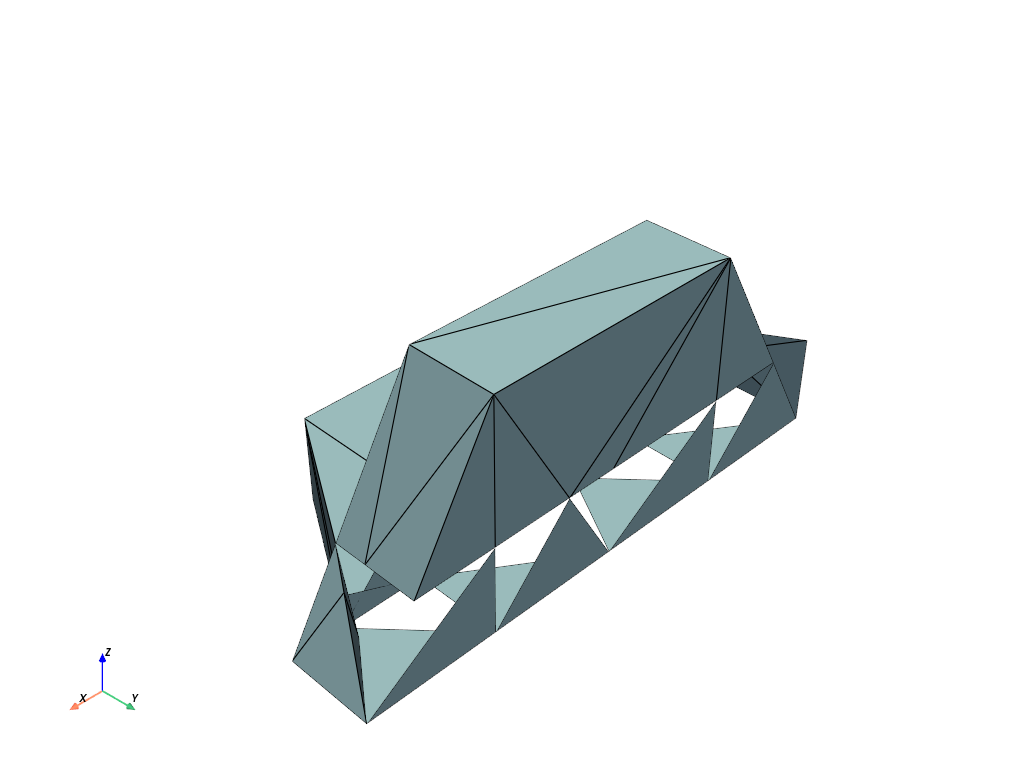

In [35]:
import numpy as np
import pyvista as pv
import json

def create_hexagonal_prism(radius=1.0, height=2.0):
    """
    Creates a hexagonal prism by defining a 2D hexagon and extruding it along z.
    The resulting mesh is triangulated and cleaned to help with Boolean operations.
    
    Parameters:
        radius (float): The radius of the circumscribed circle of the hexagon.
        height (float): The extrusion height (prism height).
        
    Returns:
        pv.PolyData: A cleaned, triangulated hexagonal prism.
    """
    # Create 6 points in the XY plane for a regular hexagon.
    angles = np.linspace(0, 2 * np.pi, 7)[:-1]  # 6 equally spaced angles
    points = np.array([[radius * np.cos(a), radius * np.sin(a), 0] for a in angles])
    
    # Define the face connectivity: first number is the number of points in the face.
    faces = np.hstack([[6], np.arange(6)])
    
    # Create a PolyData object representing the 2D hexagon.
    hexagon = pv.PolyData(points, faces)
    
    # Extrude the polygon along the z-axis with capping.
    prism = hexagon.extrude([0, 0, height], capping=True)
    
    # Triangulate and clean the mesh to improve robustness for Boolean operations.
    prism = prism.triangulate().clean()
    return prism

# ----- Configuration -----
radius = 1.5        # Radius for the hexagons
height = 0.5        # Height of the prisms
rotation_degrees = 90  # Rotation (in degrees) for the second prism

# ----- Create the Prisms -----
prism1 = create_hexagonal_prism(radius, height)
prism2 = create_hexagonal_prism(radius, height)

# ----- Rotate the Second Prism -----
prism2.rotate_x(rotation_degrees, inplace=True)

# ----- Attempt Boolean Union -----
try:
    merged = prism1.boolean_union(prism2)
except Exception as e:
    raise RuntimeError("Boolean union failed. Check that your VTK version supports Boolean operations (VTK 9+ is recommended).") from e

if merged is None or merged.n_points == 0:
    raise RuntimeError("Boolean union failed to produce a valid mesh. Consider upgrading VTK or verifying the input geometries.")

# ----- Export Vertices and Faces -----
# Export vertices as an Nx3 array.
vertices = merged.points

# PyVista stores faces in a flat array: [n, idx0, idx1, ..., idx(n-1), ...]
faces = []
faces_flat = merged.faces
i = 0
while i < len(faces_flat):
    n = faces_flat[i]
    face = faces_flat[i+1:i+1+n]
    faces.append(face.tolist())
    i += n + 1

# Save vertices to a plain text file.
np.savetxt('vertices.txt', vertices, fmt='%.8f')
# Save faces to a JSON file.
with open('faces.json', 'w') as f:
    json.dump(faces, f, indent=4)

print("Exported vertices to 'vertices.txt' and faces to 'faces.json'.")

# ----- Visualize the Merged Mesh -----
plotter = pv.Plotter()
plotter.add_mesh(merged, color='lightblue', show_edges=True)
plotter.add_axes()
plotter.show()


In [46]:
merged.points

rotated_hexagon = coxeter.shapes.ConvexPolyhedron(merged.points)
plot_polyhedron(rotated_hexagon)

ValueError: Input vertices must be a convex set. Vertices [1, 2, 3, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68] are inside the shape (or coplanar).

In [45]:
faces_flat

array([ 3,  0,  1,  2,  3,  3,  1,  4,  3,  0,  2,  5,  3,  2,  6,  5,  3,
        6,  7,  5,  3,  8,  2,  3,  3,  5,  7,  9,  3, 10,  7,  8,  3,  5,
        9, 11,  3, 12,  9, 10,  3, 13, 14, 15,  3, 16, 17, 18,  3, 13, 15,
       19,  3, 15, 20, 19,  3, 20, 21, 19,  3, 22, 15, 16,  3, 22, 23, 21,
        3, 19, 21, 24,  3, 25, 21, 23,  3, 19, 24, 26,  3, 27, 24, 25,  3,
       12, 28, 29,  3, 30, 11,  5,  3, 29, 28, 26,  3, 19, 30,  5,  3, 19,
       26, 30,  3, 19,  5,  0,  3, 13, 19,  0,  3,  0,  1, 13,  3,  1, 31,
       13,  3, 31, 14, 13,  3, 32, 33,  4,  3, 32, 14, 33,  3, 34, 35, 36,
        3, 37, 35, 38,  3, 34, 39, 35,  3, 38, 39, 40,  3, 34, 41, 39,  3,
       42, 43, 41,  3, 43, 39, 41,  3, 40, 42, 44,  3, 45, 44, 46,  3, 41,
       46, 42,  3, 47, 48, 49,  3, 50, 51, 47,  3, 52, 53, 51,  3, 49, 53,
       48,  3, 52, 54, 53,  3, 48, 54, 55,  3, 52, 56, 54,  3, 57, 58, 56,
        3, 58, 54, 56,  3, 59, 57, 60,  3, 59, 55, 54,  3, 61, 60, 62,  3,
       62, 63, 64,  3, 56

c:\Users\maddo\anaconda3\envs\CIERAREU\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


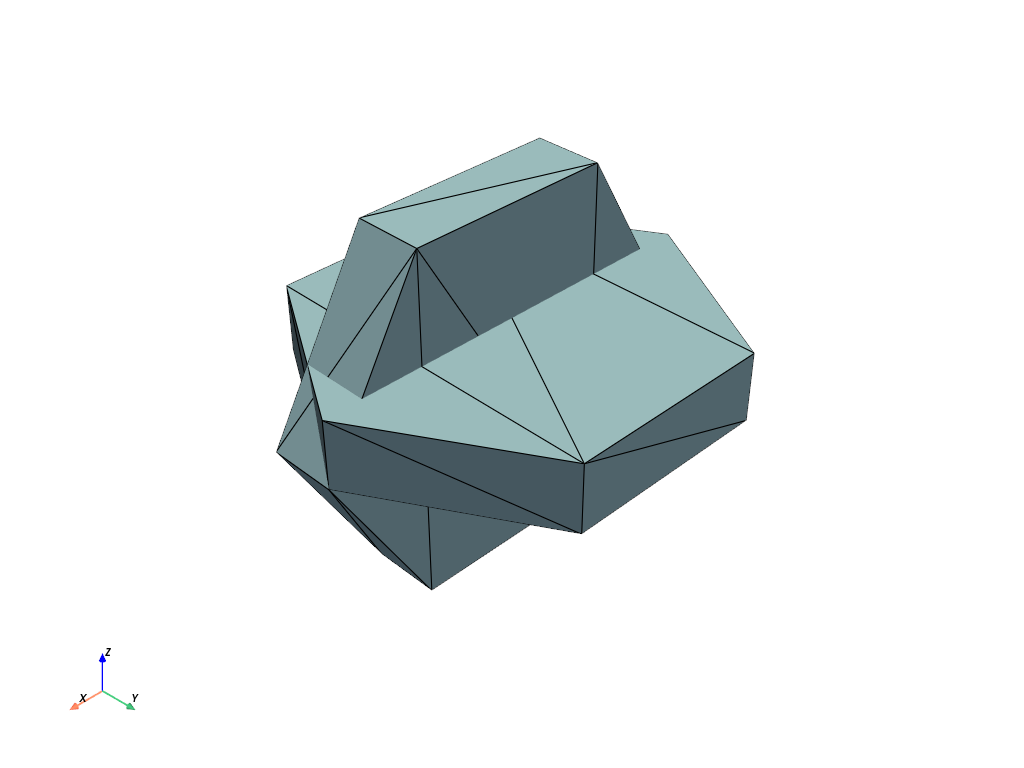

In [33]:
plotter = pv.Plotter()
plotter.add_mesh(prism1, color='lightblue', show_edges=True)
plotter.add_mesh(prism2, color='lightblue', show_edges=True)
plotter.add_axes()
plotter.show()

In [26]:
vertices

pyvista_ndarray([[ 1.5000000e+00,  0.0000000e+00,  0.0000000e+00],
                 [ 1.2990381e+00,  3.4807628e-01,  0.0000000e+00],
                 [ 1.2990381e+00, -3.4807628e-01,  0.0000000e+00],
                 [ 7.5000000e-01, -1.2990381e+00,  0.0000000e+00],
                 [ 9.5096195e-01, -9.5096183e-01,  0.0000000e+00],
                 [ 7.5000000e-01, -1.0669873e+00,  0.0000000e+00],
                 [ 3.4807625e-01, -1.2990381e+00,  0.0000000e+00],
                 [ 7.5000000e-01,  1.2990381e+00,  0.0000000e+00],
                 [ 6.4951909e-01,  1.1250000e+00,  0.0000000e+00],
                 [ 7.5000000e-01,  1.0669873e+00,  0.0000000e+00],
                 [-7.5000000e-01, -1.2990381e+00,  0.0000000e+00],
                 [-3.4807631e-01, -1.2990381e+00,  0.0000000e+00],
                 [-6.4951909e-01, -1.1250000e+00,  0.0000000e+00],
                 [ 3.4807631e-01,  1.2990381e+00,  0.0000000e+00],
                 [-7.5000000e-01,  1.2990381e+00,  0.0000000e+